# Redes Neurais Artificiais
 **Nome: João Pedro Miranda Marques**
 
 **Matrícula: 2017050495** 

# Extreme Learning Machine - ELM

As imagens abaixo foram criadas utilizando o codigo em R dado pelo professor para as funcoes de trainELM e YELM. 

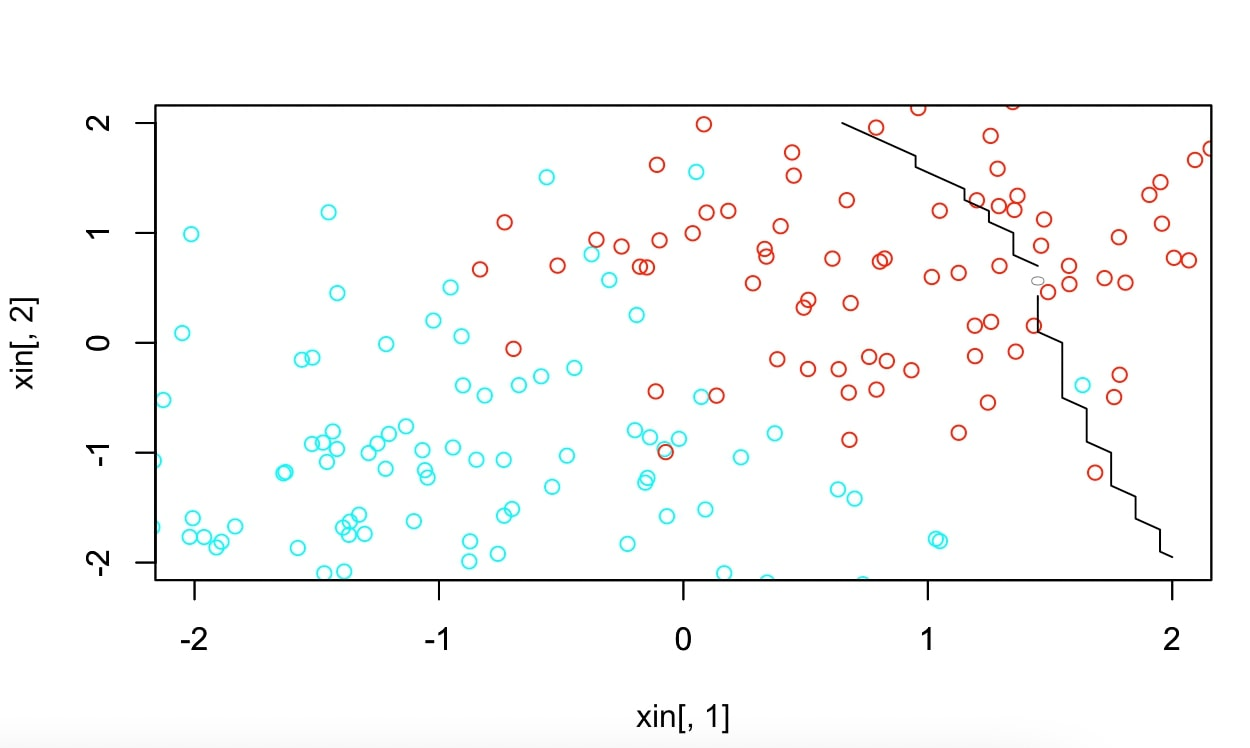

In [329]:
from IPython.display import Image
# 5 neuronios 2D
Image(filename='pics/pic1.jpg',width=800, height=400)

Classificação com 5 neuronios nesse problema ficou com baixa acurácia.

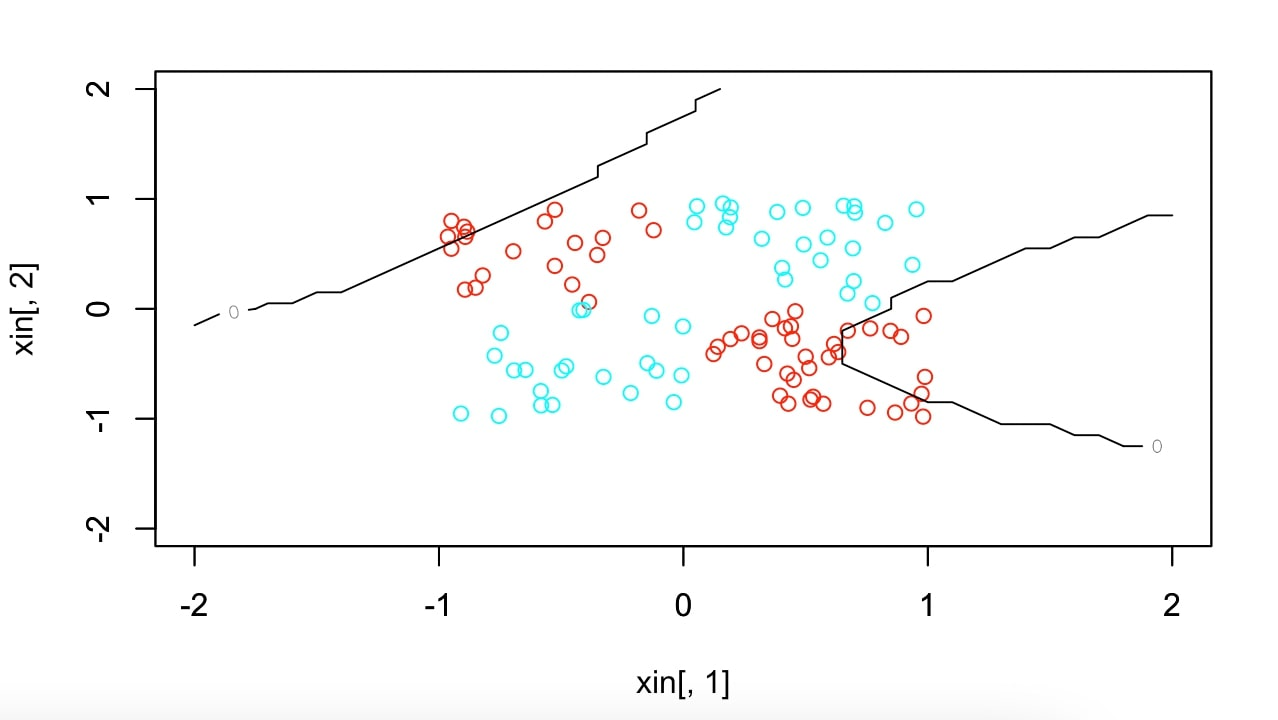

In [330]:
# 5 neuronios XOR
Image(filename='pics/pic2.jpg',width=800, height=400)

Classificação com 5 neuronios nesse problema ficou com baixa acurácia.

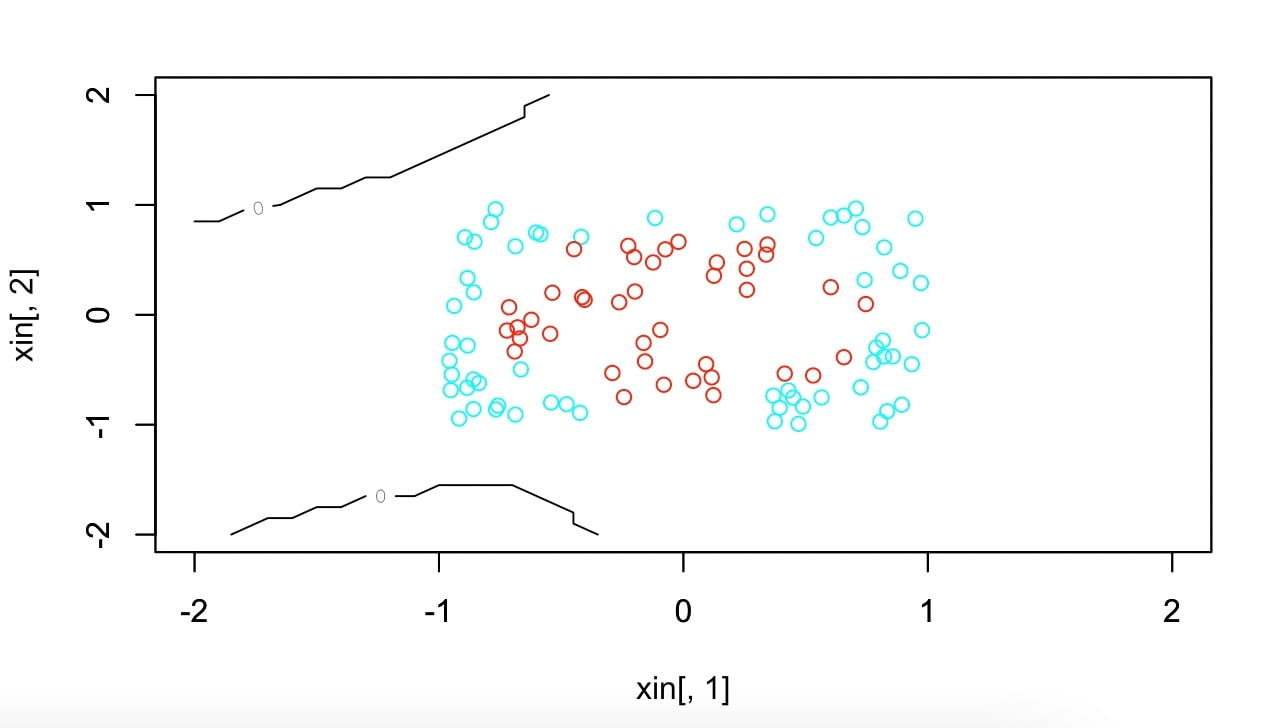

In [331]:
# 5 neuronios circles
Image(filename='pics/pic3.jpg',width=800, height=400)

Classificação com 5 neuronios nesse problema ficou com baixa acurácia.

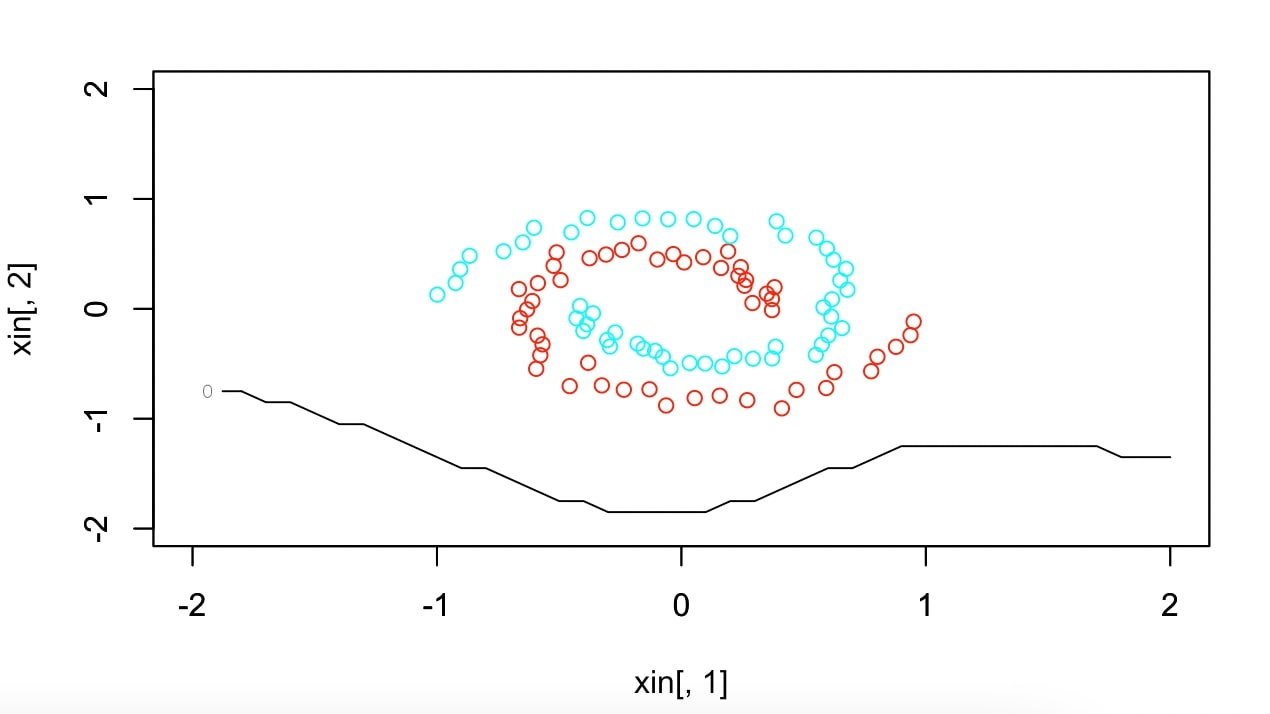

In [332]:
# 5 neuronios spirals
Image(filename='pics/pic4.jpg',width=800, height=400)

Classificação com 5 neuronios nesse problema ficou com baixa acurácia.

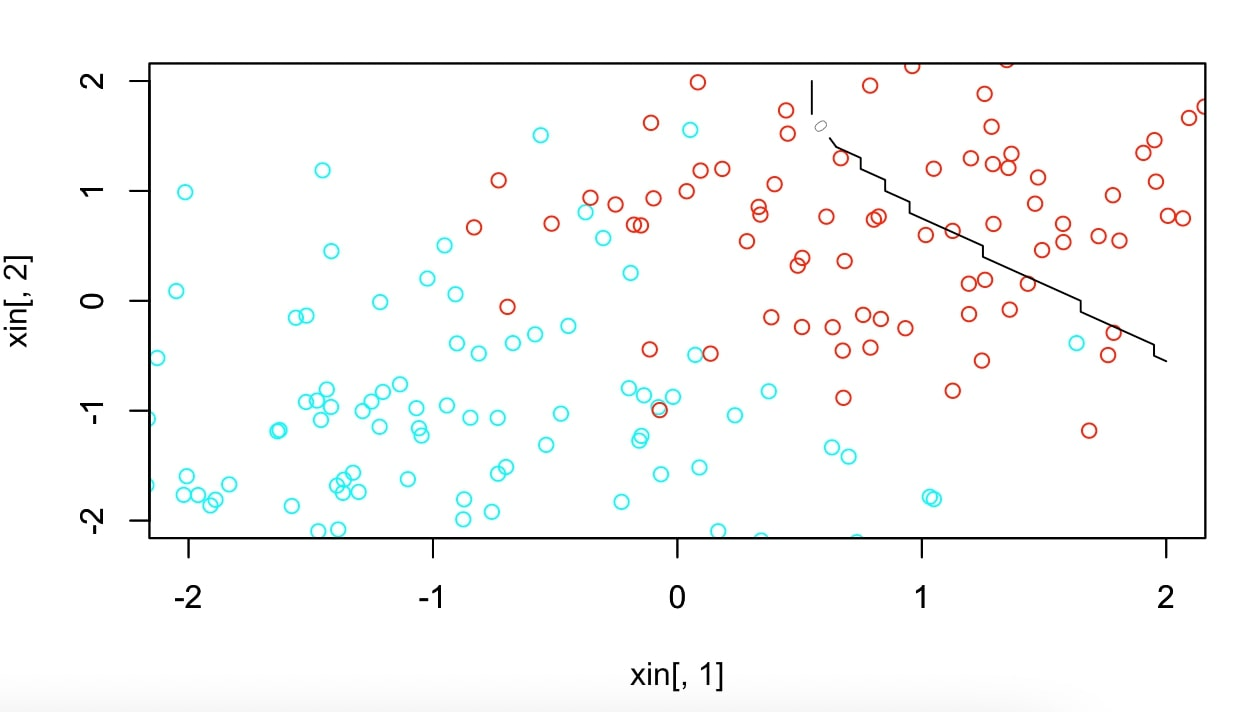

In [333]:
# 10 neuronios 2D
Image(filename='pics/pic5.jpg',width=800, height=400)

Classificação com 10 neuronios nesse problema ficou com baixa acurácia.

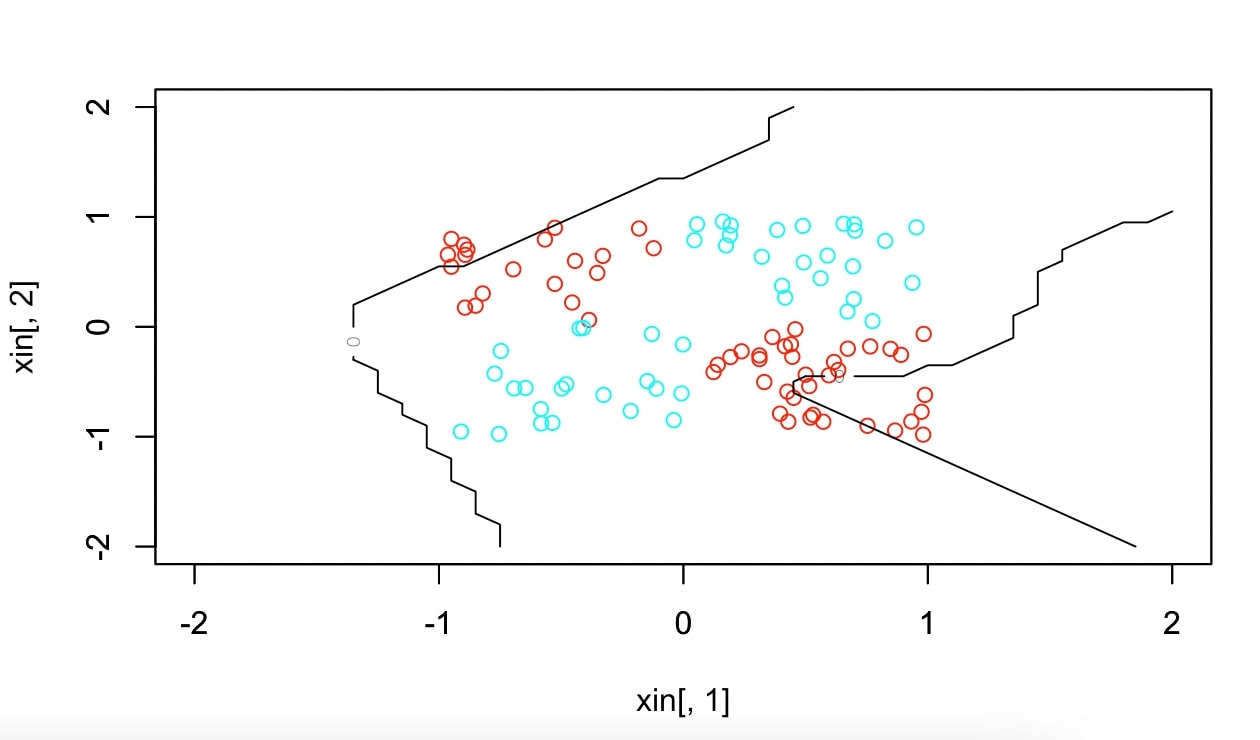

In [334]:
# 10 neuronios XOR
Image(filename='pics/pic6.jpg',width=800, height=400)

Classificação com 10 neuronios nesse problema ficou com baixa acurácia.

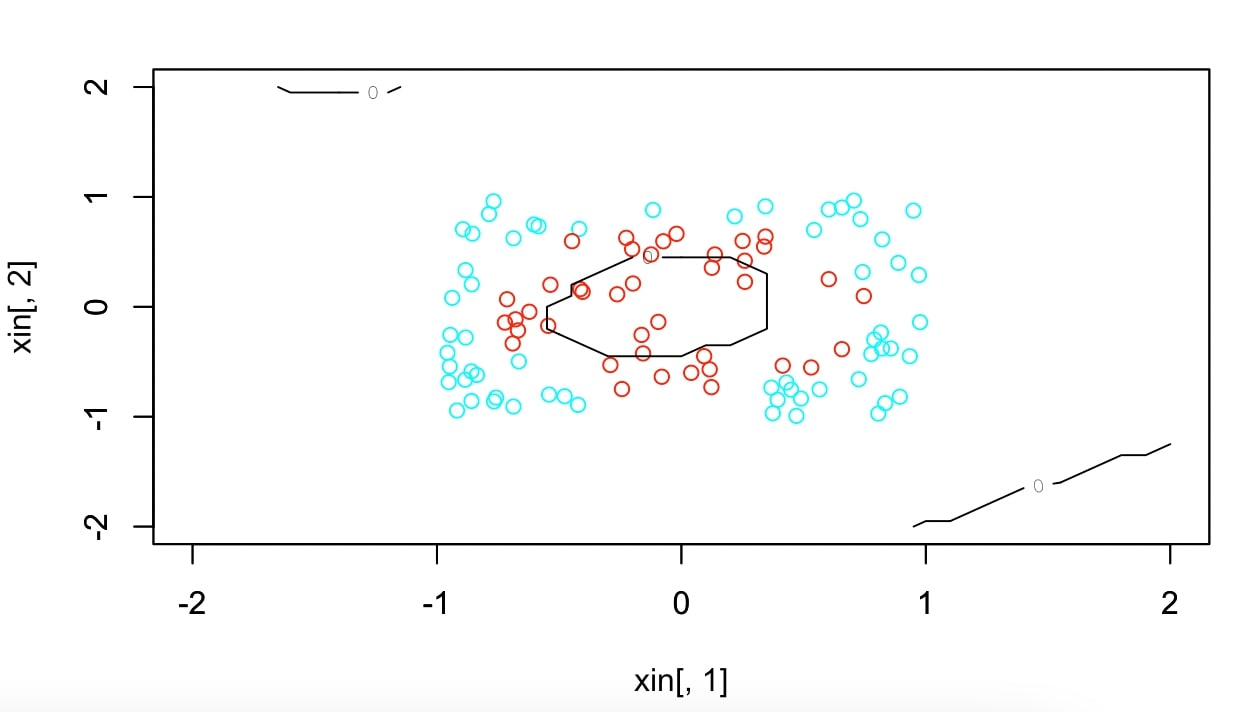

In [335]:
# 10 neuronios circles
Image(filename='pics/pic7.jpg',width=800, height=400)

Classificação com 10 neuronios nesse problema ficou com baixa acurácia.

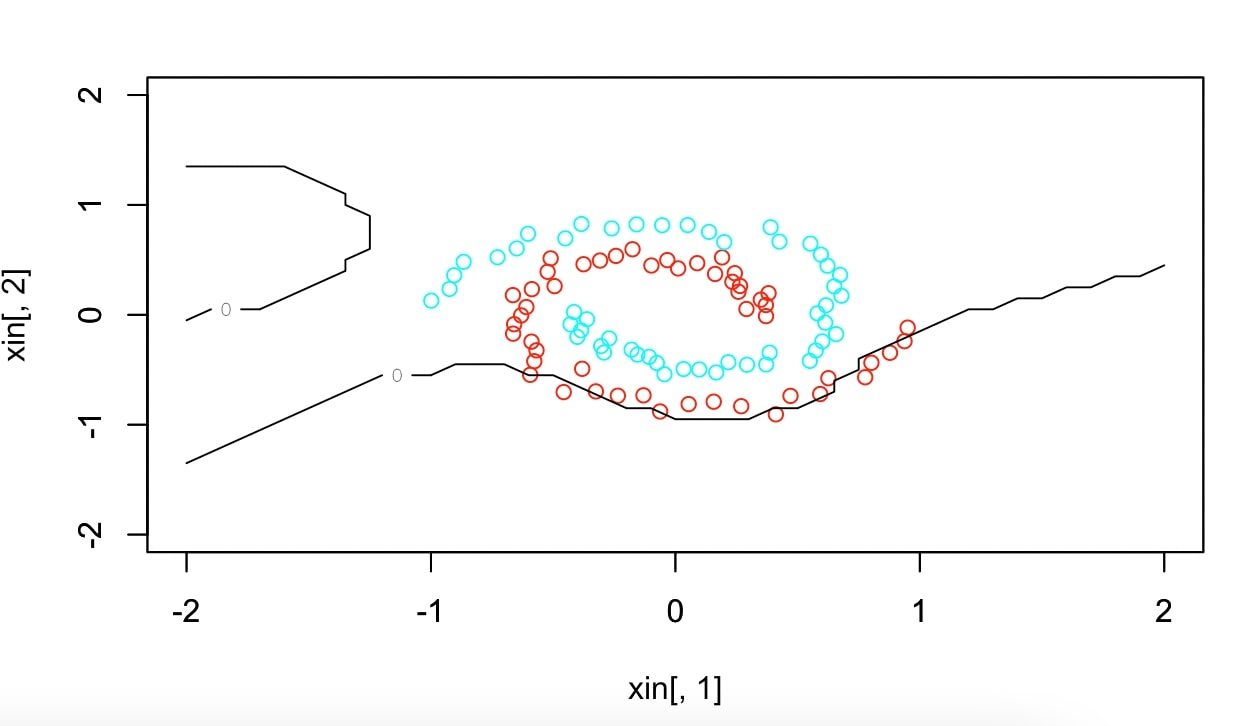

In [336]:
# 10 neuronios spirals
Image(filename='pics/pic8.jpg',width=800, height=400)

Classificação com 10 neuronios nesse problema ficou com baixa acurácia.

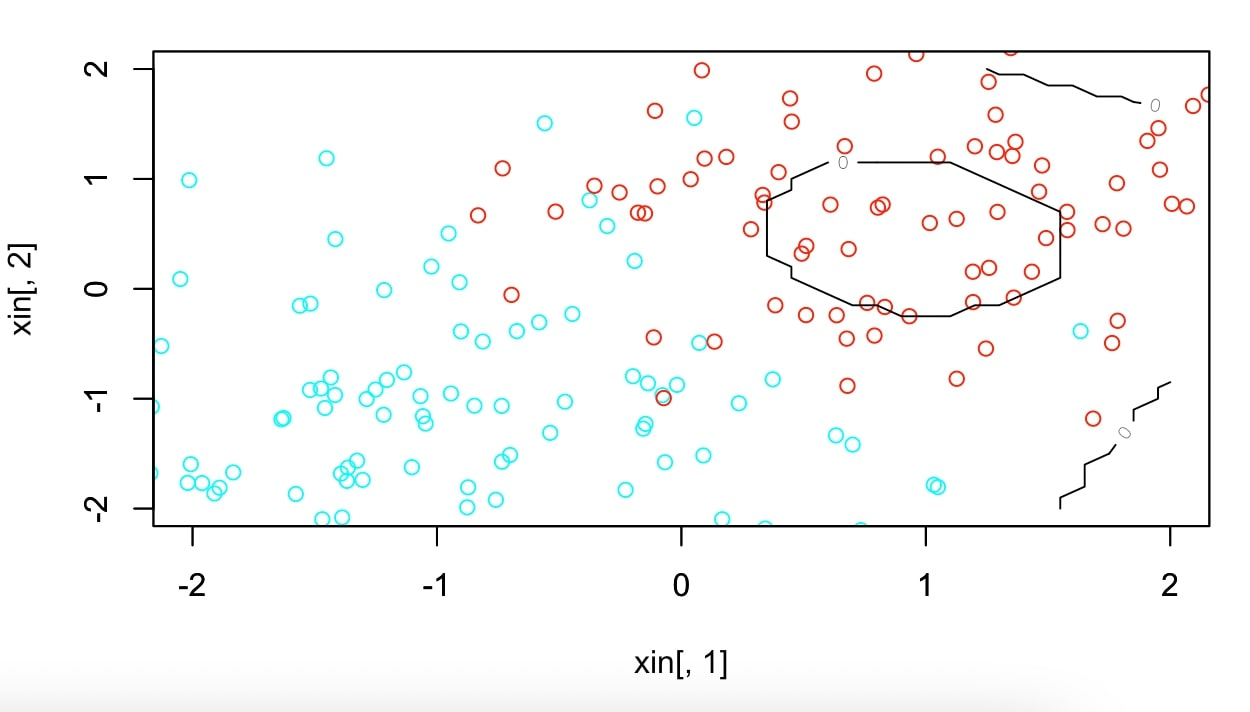

In [337]:
# 30 Neuronios 2D
Image(filename='pics/pic9.jpg',width=800, height=400)

Classificação com 30 neuronios nesse problema ficou com overfitting.

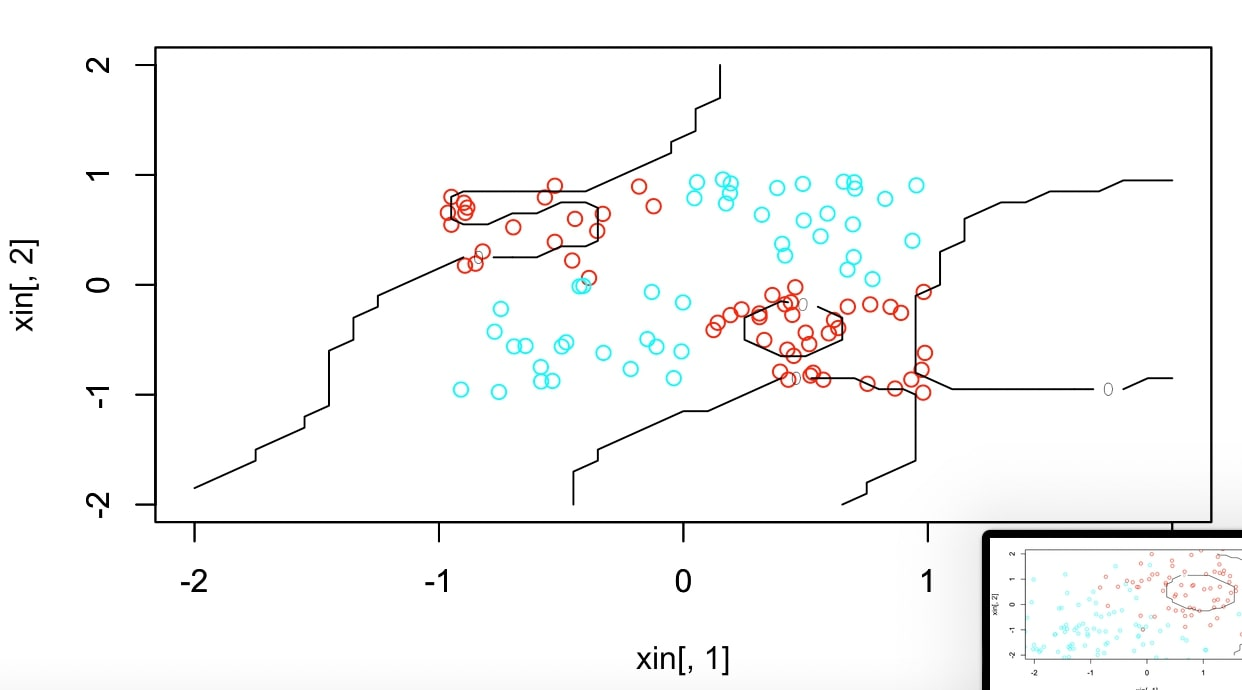

In [338]:
# 30 Neuronios XOR
Image(filename='pics/pic10.jpg',width=800, height=400)

Classificação com 30 neuronios nesse problema ficou com acurácia aceitável.

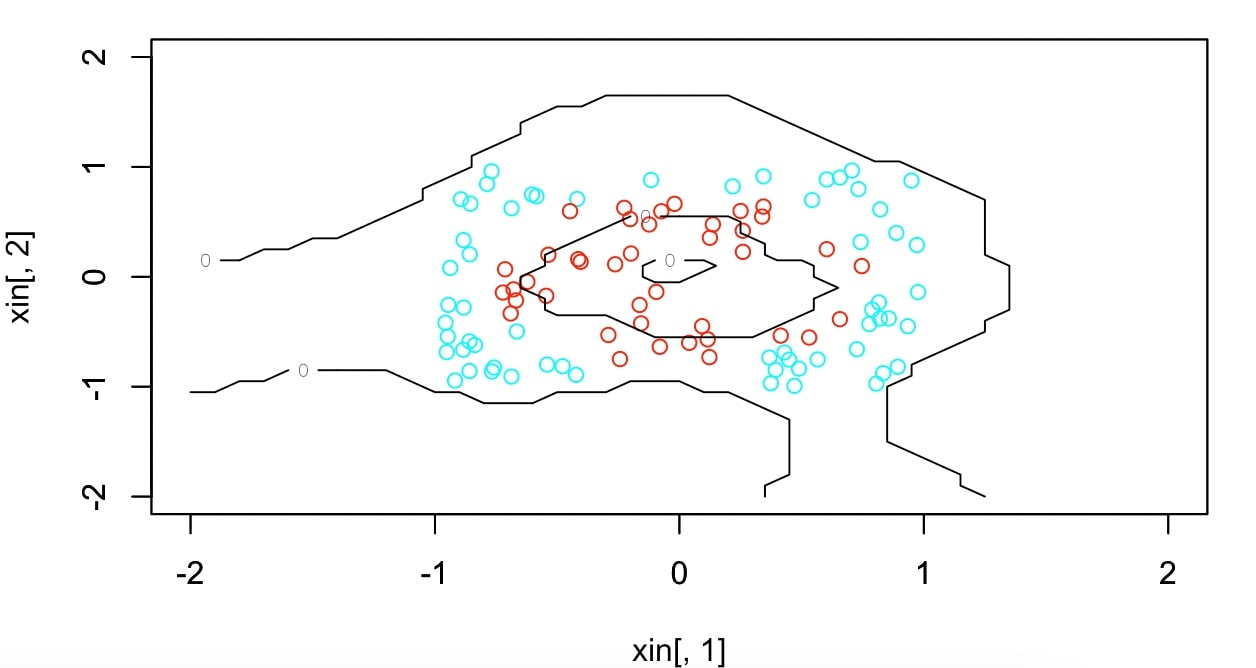

In [339]:
# 30 Neuronios circles
Image(filename='pics/pic11.jpg',width=800, height=400)

Classificação com 30 neuronios nesse problema ficou com acurácia aceitável.

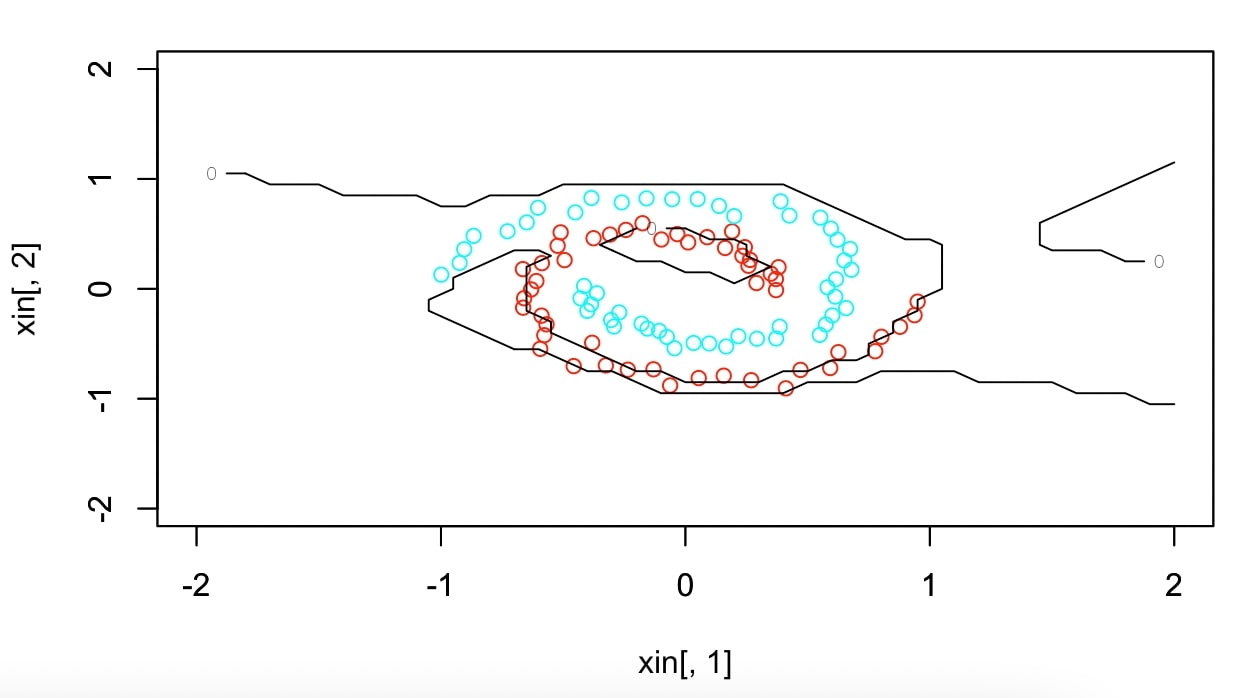

In [340]:
# 30 Neuronios spirals
Image(filename='pics/pic12.jpg',width=800, height=400)

Classificação com 30 neuronios nesse problema ficou com boa acurácia.

Em Python, apesar das funções trainELM() e YELM() funcionarem corretamente, tive dificuldade na etapa de plotar no contour. Por isso os resultados graficos nao ficaram bons.

Essa é uma segunda tentativa que fez as regioes de classificação ficarem melhores.


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Algoritmo de treinamento da Rede ELM traduzida de R para Python.

In [4]:
# Treinamento de uma rede ELM
def trainELM(xin, yin, nNeurons, par):
    xin = pd.DataFrame(xin)
    yin = pd.DataFrame(yin)
    
    nDimension = xin.shape[1]     # Dimensao de entrada.

    # Adiciona ou não um termo de polarização ao vetor de treinamento w.
    if par == 1:
        xin.insert(nDimension, nDimension, 1)
        # Z<−replicate(p, runif((n+1),−0.5,0.5))
        Z = [np.random.uniform(low=-0.5, high=0.5, size=nDimension+1) for _ in range(nNeurons)]
    else:
        Z = [np.random.uniform(low=-0.5, high=0.5, size=nDimension) for _ in range(nNeurons)]
   
    Z = pd.DataFrame(Z)
    Z = Z.T

    H = np.tanh(xin @ Z)

    W = ( np.linalg.pinv(H) @ yin)    #W<−pseudoinverse(H) %*% yin 

    return [W,H,Z]


Algoritmo de Predição da ELM traduzido de R para Python

In [5]:
# Saída de uma rede ELM
def YELM(xin, Z, W, par):

    xin = pd.DataFrame(xin)
    Z = pd.DataFrame(Z)
    W = pd.DataFrame(W)

    nDimension = xin.shape[1]  # Dimensao de entrada.

    # Adiciona ou não termo de polarização
    if(par == 1):
        xin.insert(nDimension, nDimension, 1)
        # np.c_[ xin, np.ones(xin.shape[0]) ] 

    # print("xin:", xin.shape)
    # print("Z:", Z.shape)
    H = np.tanh(xin @ Z)
    # print("H:", H.shape)
    # print("W:", W.shape)
    Yhat = np.sign(H @ W)
    
    return Yhat

Código fonte do exercício

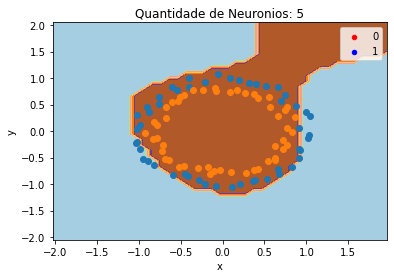

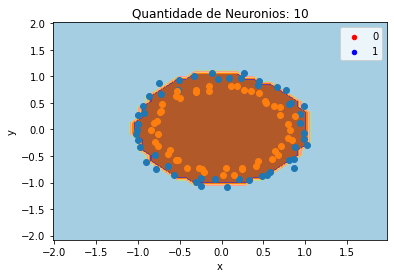

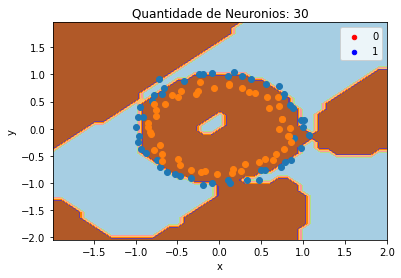

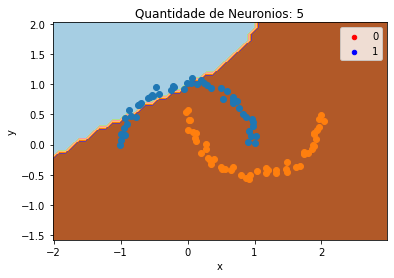

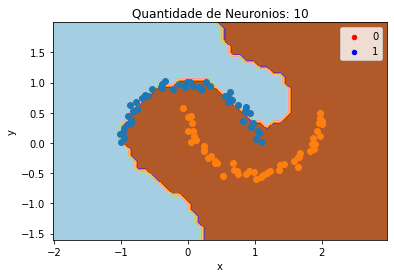

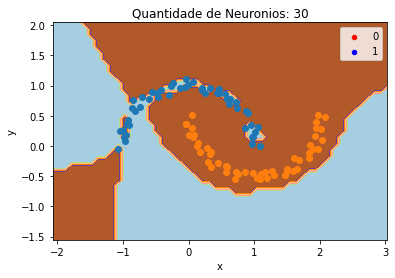

In [16]:

from sklearn.datasets import make_circles, make_moons, make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plotContour(format, nNeurons):
    if(format == 1):
        X, y = make_circles(n_samples=100, noise=0.05)
    elif(format == 2):
        X, y = make_moons(n_samples=100, noise=0.05)
    # scatter plot, dots colored by class value

    # define bounds of the domain
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    # define the x and y scale
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)
    # create all of the lines and rows of the grid
    xx, yy = meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = hstack((r1,r2))

    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = pyplot.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

    retlist = trainELM(X[:,:2], y, nNeurons, 1)

    W = retlist[0]
    H = retlist[1]
    Z = retlist[2]

    #plotting contours
    # Make prediction from training process
    yhat = YELM(grid, Z, W, 1)
    yhat = (yhat > 0.5).astype(int)
    yhat = pd.DataFrame(yhat).to_numpy()

    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    pyplot.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = where(y == class_value)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
    # show the plot
    if(nNeurons == 5):
        plt.title('Quantidade de Neuronios: 5')
    elif(nNeurons == 10):
        plt.title('Quantidade de Neuronios: 10')
    elif(nNeurons == 30):
        plt.title('Quantidade de Neuronios: 30')
    pyplot.show()

plotContour(1,5)
plotContour(1,10)
plotContour(1,30)
plotContour(2,5)
plotContour(2,10)
plotContour(2,30)

